# IMPORTING THE LIBRARIES

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# LOADING THE DATASET

In [58]:
data = pd.read_csv('Final DataSet.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  float64
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  label      14249 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.4+ MB


# CHECKING FOR NULL VALUES

In [19]:
data.isnull().sum()

Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0
label        0
dtype: int64

# CHECKING FOR DUPLICTAES

In [21]:
data.duplicated().sum()

3

In [60]:
newdf=data.drop_duplicates()
newdf.shape

(14246, 13)

In [62]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14246 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14246 non-null  float64
 1   Latitude   14246 non-null  float64
 2   Speed      14246 non-null  float64
 3   Distance   14246 non-null  float64
 4   Time       14246 non-null  object 
 5   Acc X      14246 non-null  float64
 6   Acc Y      14246 non-null  float64
 7   Acc Z      14246 non-null  float64
 8   Heading    14246 non-null  float64
 9   gyro_x     14246 non-null  float64
 10  gyro_y     14246 non-null  float64
 11  gyro_z     14246 non-null  float64
 12  label      14246 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


# TIME OBJECT TYPE CONVERSION

In [64]:
newdf['Time'] = pd.to_datetime(newdf['Time'], format='%H-%M-%S', errors='coerce')

In [66]:
newdf.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,1900-01-01 18:45:12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,1900-01-01 18:45:12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,1900-01-01 18:45:13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,1900-01-01 18:45:13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,1900-01-01 18:45:13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


# HISTOGRAM PLOTS

In [68]:
col_list=list(newdf.columns)

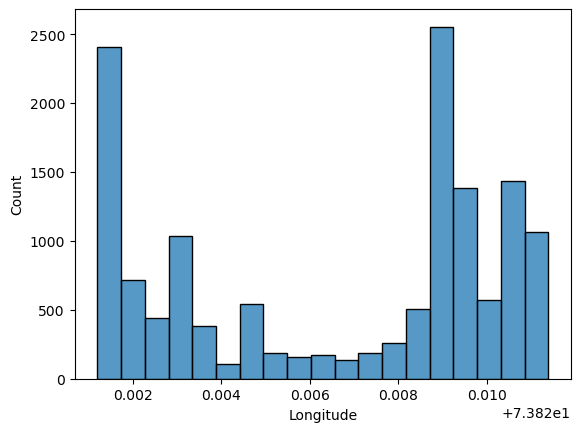

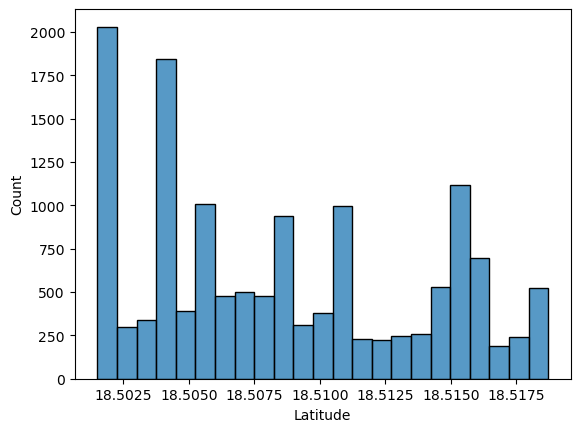

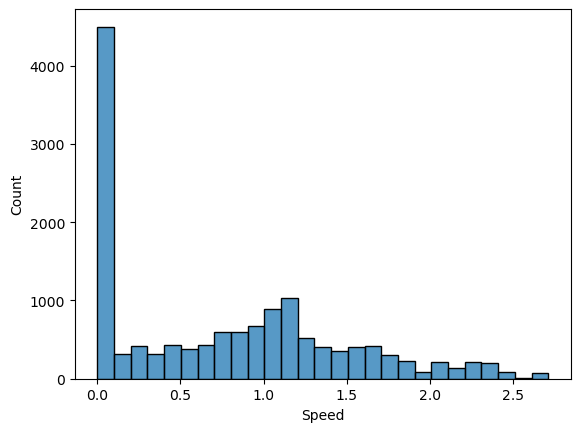

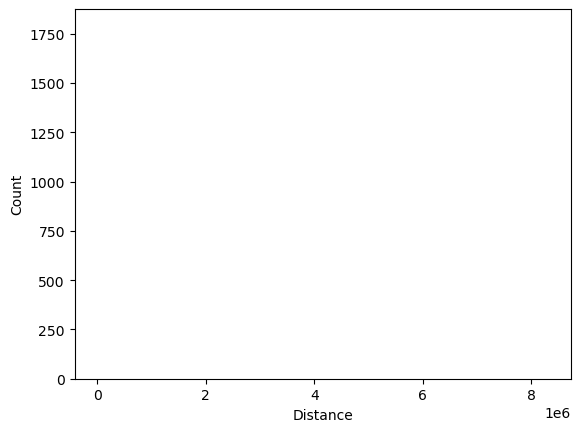

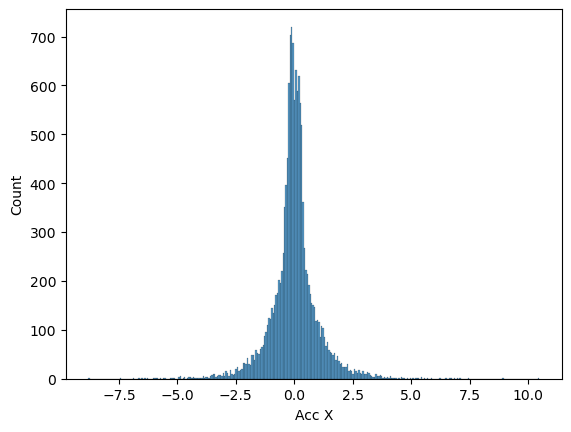

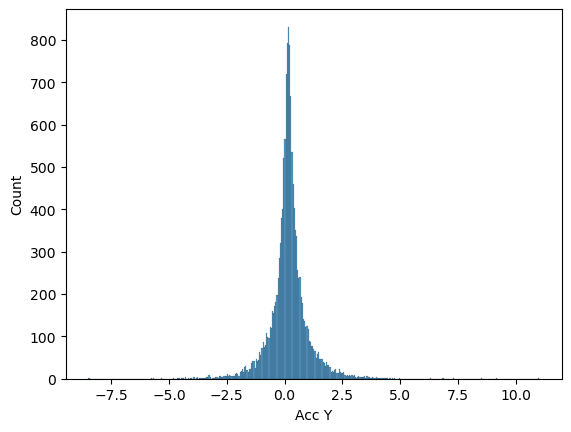

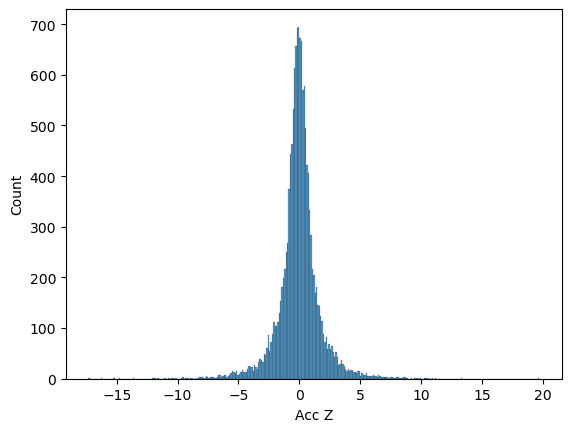

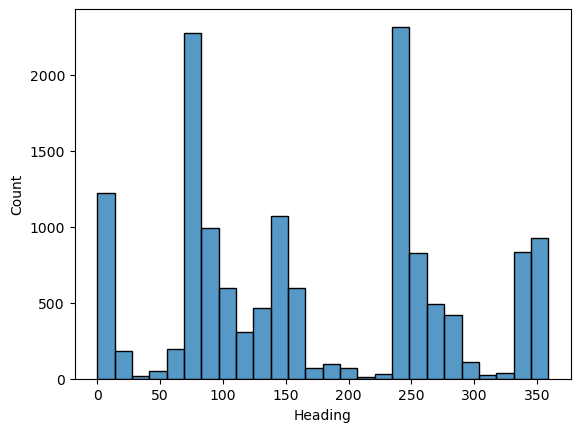

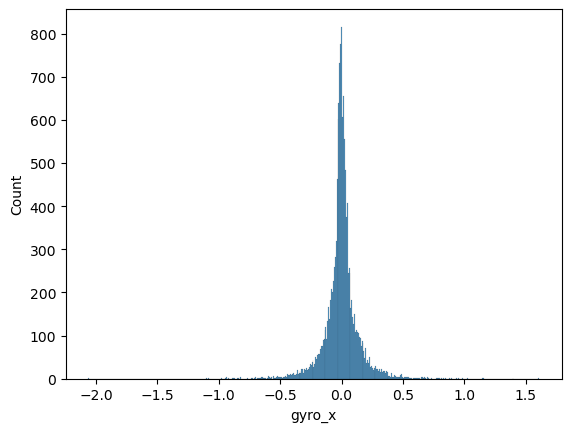

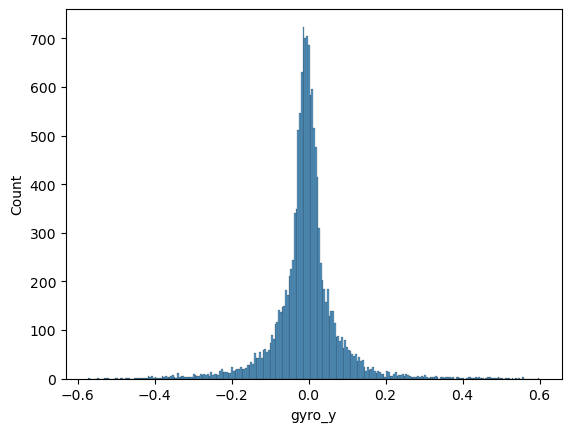

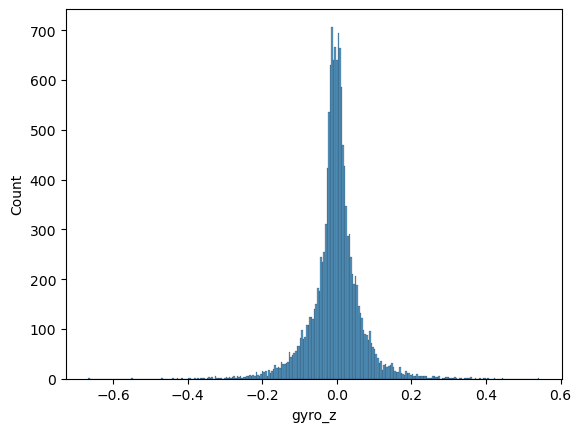

In [70]:
for col in col_list:
    if newdf[col].dtypes == "float64":
        sns.histplot(newdf[col])
        plt.show()

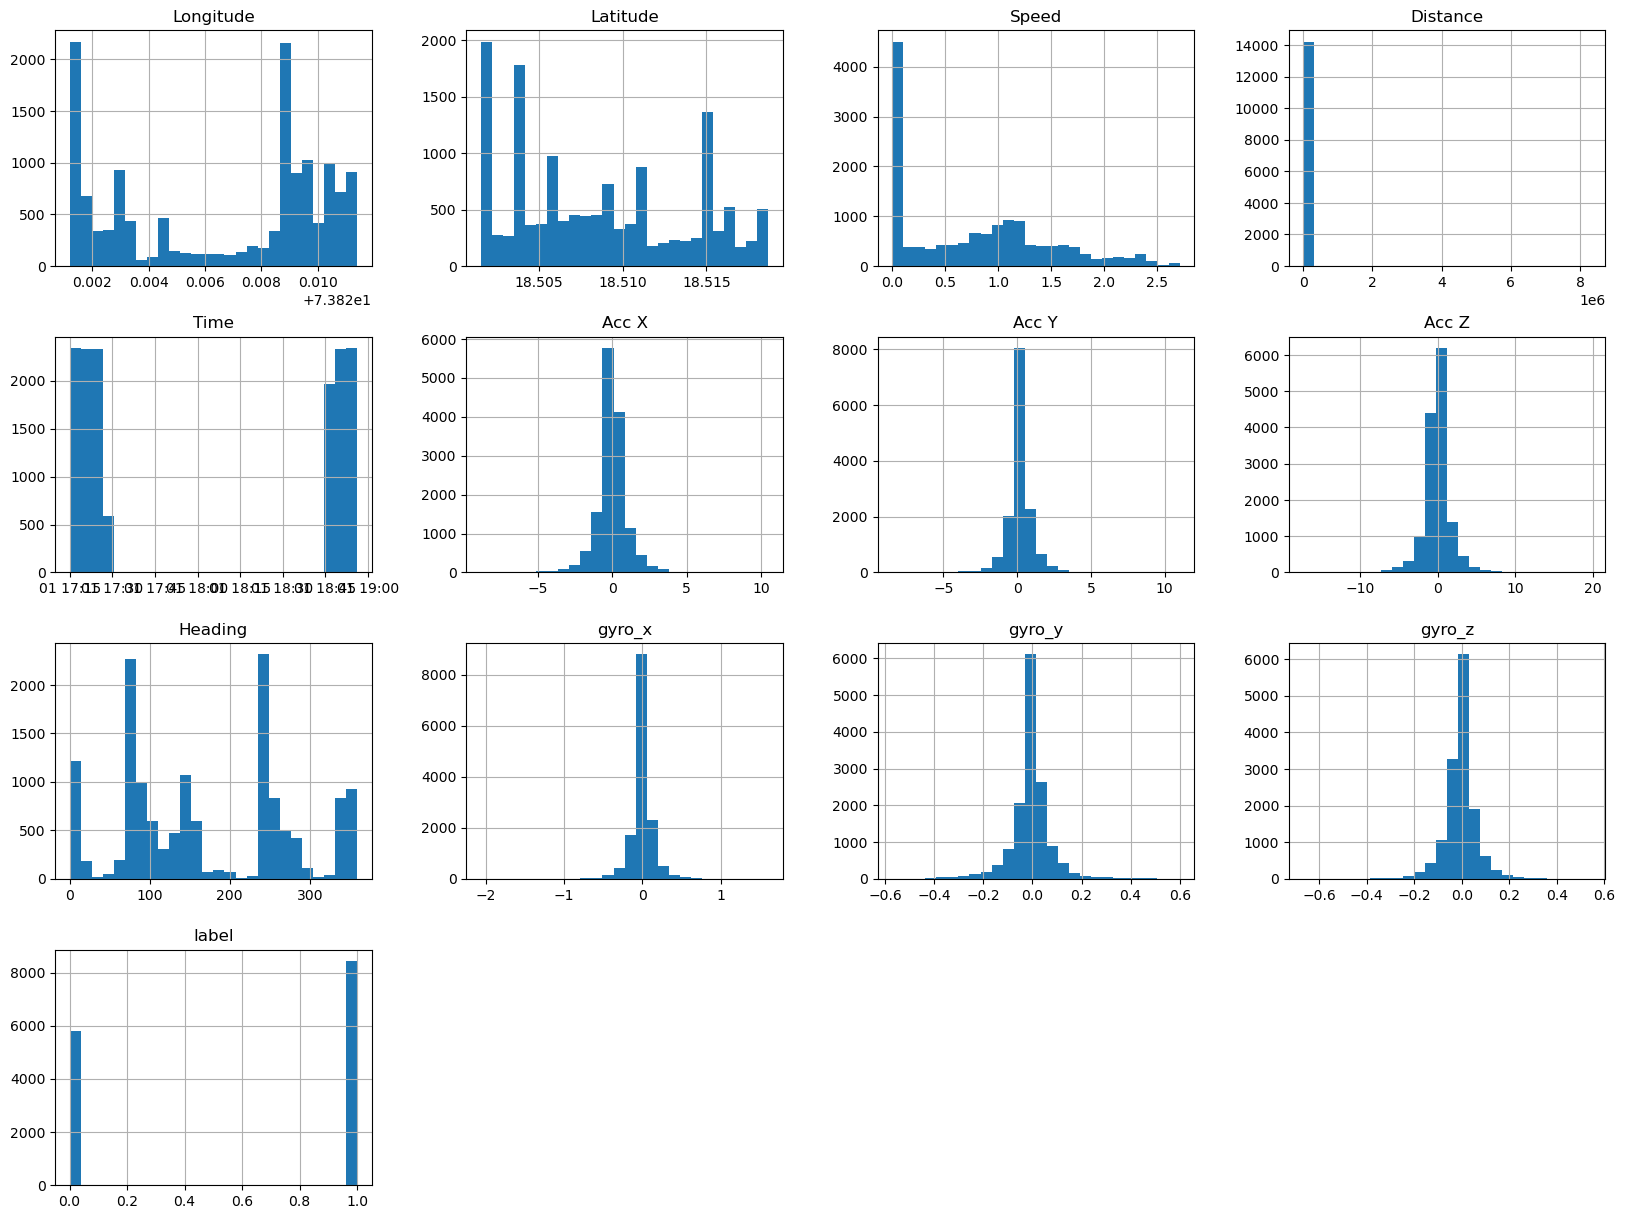

In [99]:
# Histogram
newdf.hist(bins=26, figsize=(20, 15))
plt.show()

# APPLYING ROLLING WINDOW

In [101]:
# Load the dataset
file_path = 'Final DataSet.csv'
data = pd.read_csv(file_path)

# Remove duplicates
data_cleaned = data.drop_duplicates()

# Apply rolling window (smoothing) for noise reduction on accelerometer and gyroscope data (window=5)
data_cleaned[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']] = data_cleaned[['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']].rolling(window=5, min_periods=1).mean()

In [73]:
newdata.describe()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
count,14246.000000,14246.000000,14246.000000,1.424600e+04,14246,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000
mean,73.826564,18.508567,0.771898,2.795223e+03,1900-01-01 18:02:59.600940544,-0.001137,0.180237,-0.023576,171.269128,-0.001319,-0.006521,-0.003200,0.592587
min,73.821195,18.501504,0.000000,0.000000e+00,1900-01-01 17:14:53,-8.805807,-8.476646,-17.320633,0.000000,-2.062668,-0.571912,-0.666047,0.000000
25%,73.822785,18.504085,0.000000,4.480815e+02,1900-01-01 17:20:50,-0.378820,-0.126690,-0.701545,77.000000,-0.046690,-0.033272,-0.027224,0.000000
50%,73.828663,18.507860,0.760000,1.007369e+03,1900-01-01 17:26:47,-0.013089,0.167227,-0.025761,150.000000,-0.002219,-0.005783,-0.002179,1.000000
75%,73.829445,18.513463,1.220000,1.645653e+03,1900-01-01 18:50:21,0.362683,0.478868,0.674922,249.000000,0.044939,0.021706,0.024088,1.000000
max,73.831393,18.518714,2.712000,8.312031e+06,1900-01-01 18:56:18,10.488632,11.013258,19.725800,359.000000,1.611687,0.599585,0.542856,1.000000
std,0.003661,0.005242,0.705439,1.205988e+05,NaN,1.030982,0.837260,1.768811,105.496919,0.141039,0.087850,0.068017,0.491370


# Time Series Plot of Accelerometer

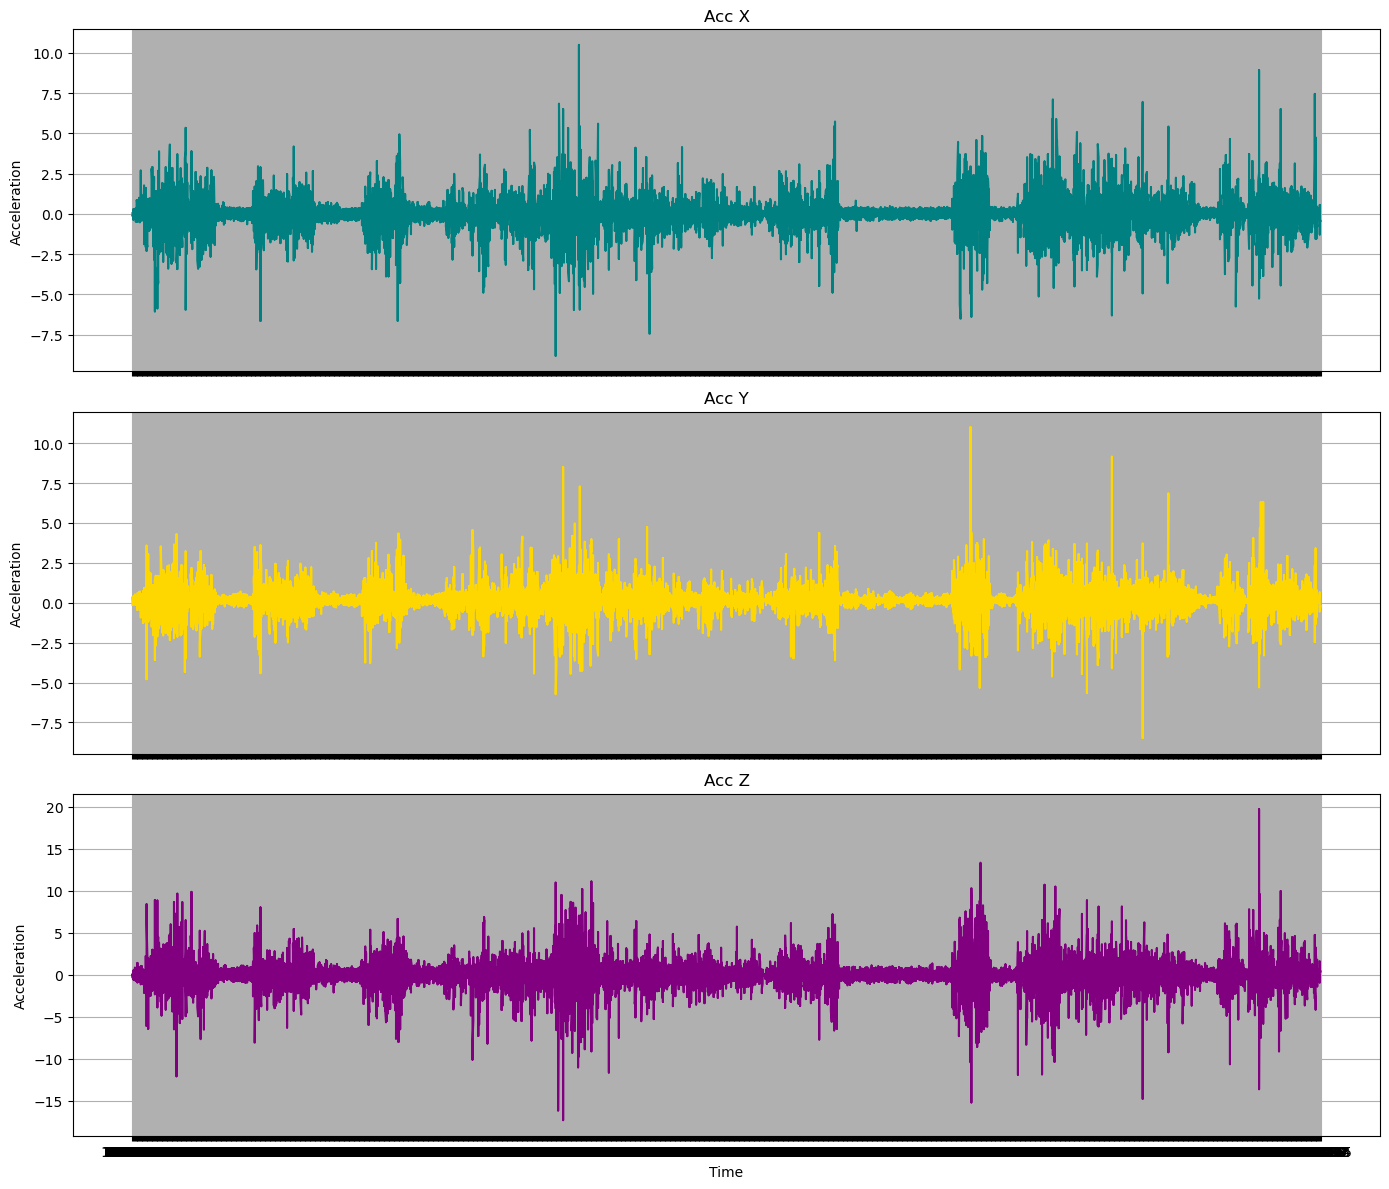

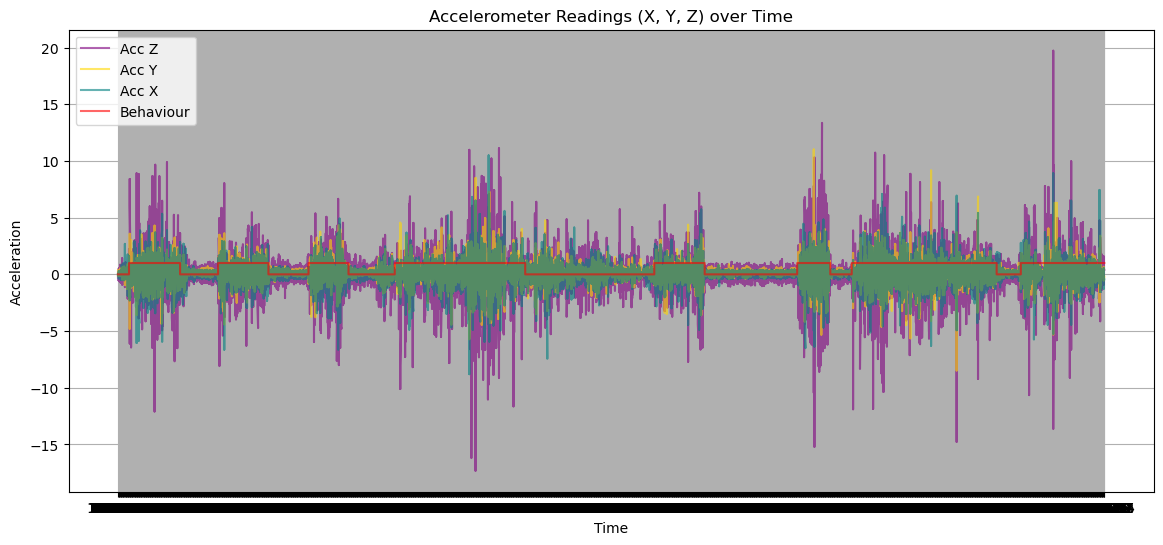

In [104]:
# Time-Series Visulaization 

# Individual Time-Series Graphs for Each Accelerometer Axes
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data['Time'], data['Acc X'], label='Acc X', color='teal')
axes[0].set_title('Acc X')
axes[0].set_ylabel('Acceleration')
axes[0].grid(True)

axes[1].plot(data['Time'], data['Acc Y'], label='Acc Y', color='gold')
axes[1].set_title('Acc Y')
axes[1].set_ylabel('Acceleration')
axes[1].grid(True)

axes[2].plot(data['Time'], data['Acc Z'], label='Acc Z', color='purple')
axes[2].set_title('Acc Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Acceleration')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Combined Time-Series Graph for Accelerometer Axes
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Acc Z'], label='Acc Z', color='purple', alpha=0.6)
plt.plot(data['Time'], data['Acc Y'], label='Acc Y', color='gold', alpha=0.6)
plt.plot(data['Time'], data['Acc X'], label='Acc X', color='teal', alpha=0.6)
plt.plot(data['Time'], data['label'], label='Behaviour', color='red', alpha=0.6)
plt.title('Accelerometer Readings (X, Y, Z) over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(True)
plt.legend()
plt.show()

# Time Series Plot of Gyroscope

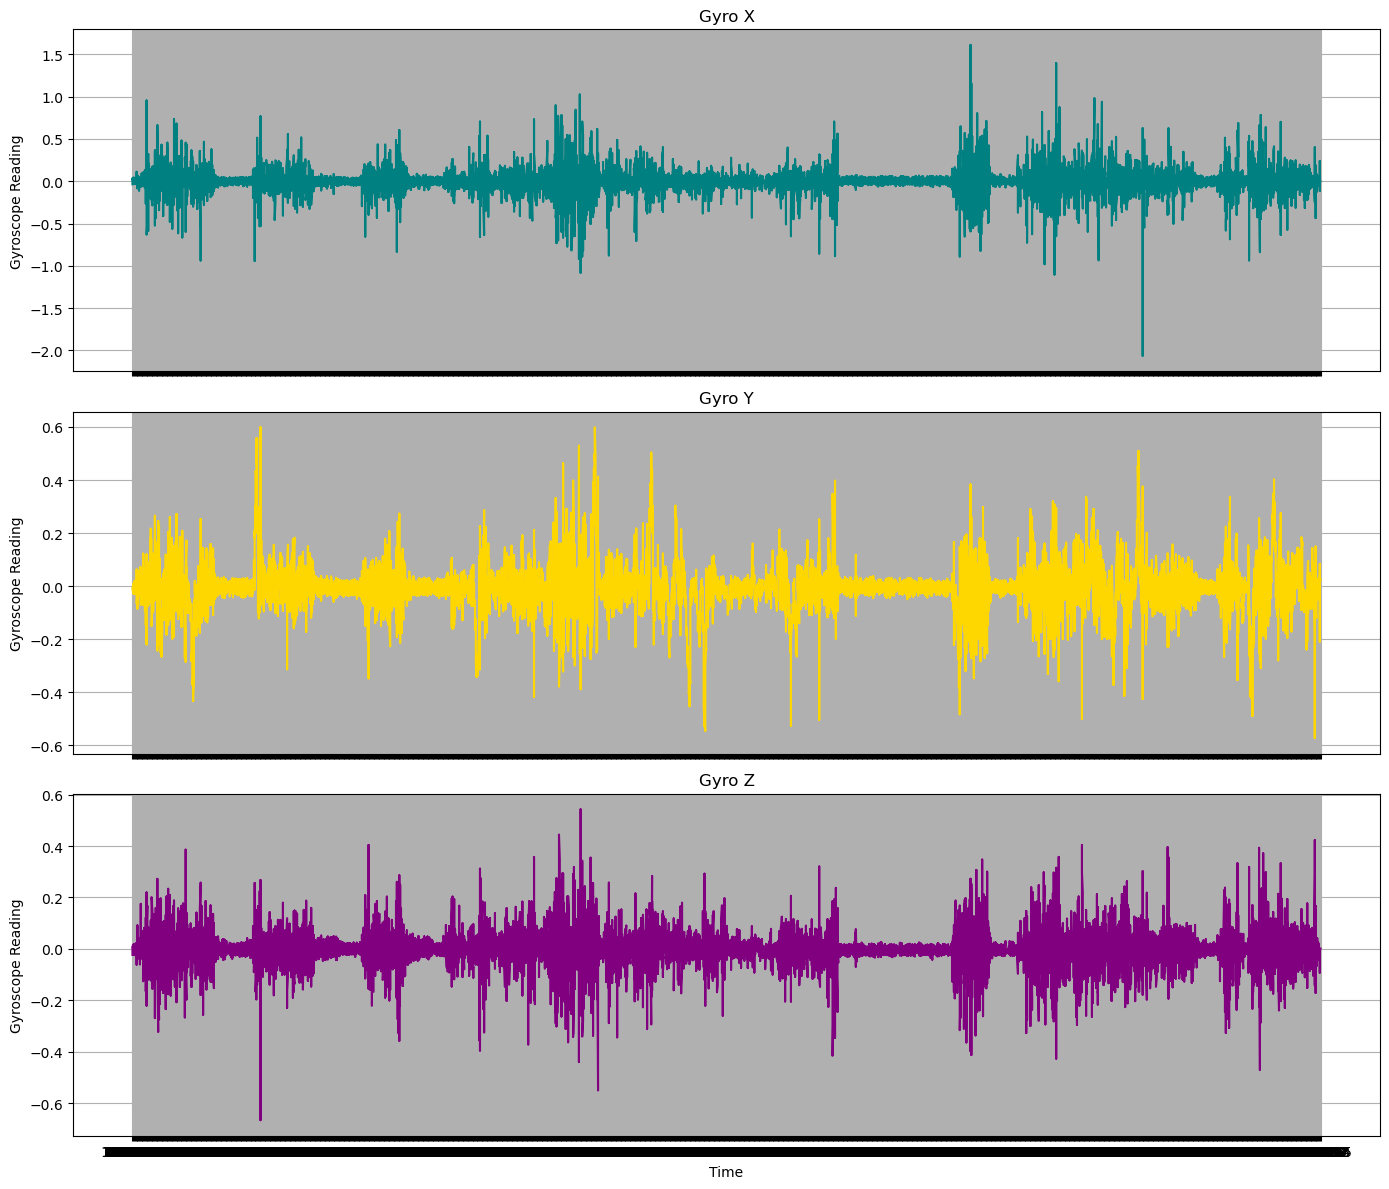

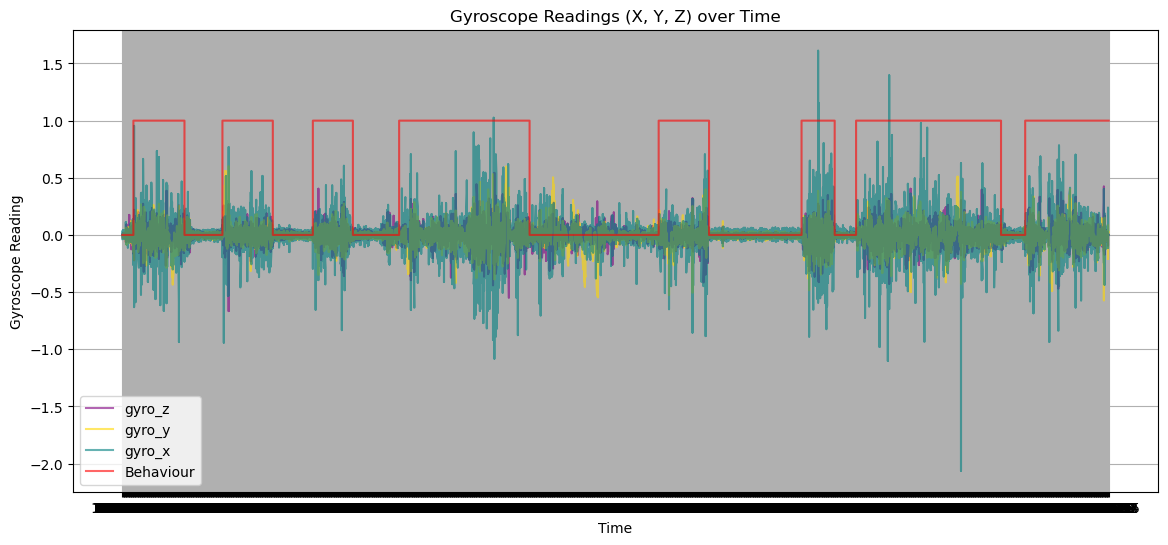

In [106]:
# Individual Time-Series Graphs for Each Gyroscope Axis
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data['Time'], data['gyro_x'], label='gyro_x', color='teal')
axes[0].set_title('Gyro X')
axes[0].set_ylabel('Gyroscope Reading')
axes[0].grid(True)

axes[1].plot(data['Time'], data['gyro_y'], label='gyro_y', color='gold')
axes[1].set_title('Gyro Y')
axes[1].set_ylabel('Gyroscope Reading')
axes[1].grid(True)

axes[2].plot(data['Time'], data['gyro_z'], label='gyro_z', color='purple')
axes[2].set_title('Gyro Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Gyroscope Reading')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Combined Time-Series Graph for Gyroscope Axes
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['gyro_z'], label='gyro_z', color='purple', alpha=0.6)
plt.plot(data['Time'], data['gyro_y'], label='gyro_y', color='gold', alpha=0.6)
plt.plot(data['Time'], data['gyro_x'], label='gyro_x', color='teal', alpha=0.6)
plt.plot(data['Time'], data['label'], label='Behaviour', color='red', alpha=0.6)
plt.title('Gyroscope Readings (X, Y, Z) over Time')
plt.xlabel('Time')
plt.ylabel('Gyroscope Reading')
plt.grid(True)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

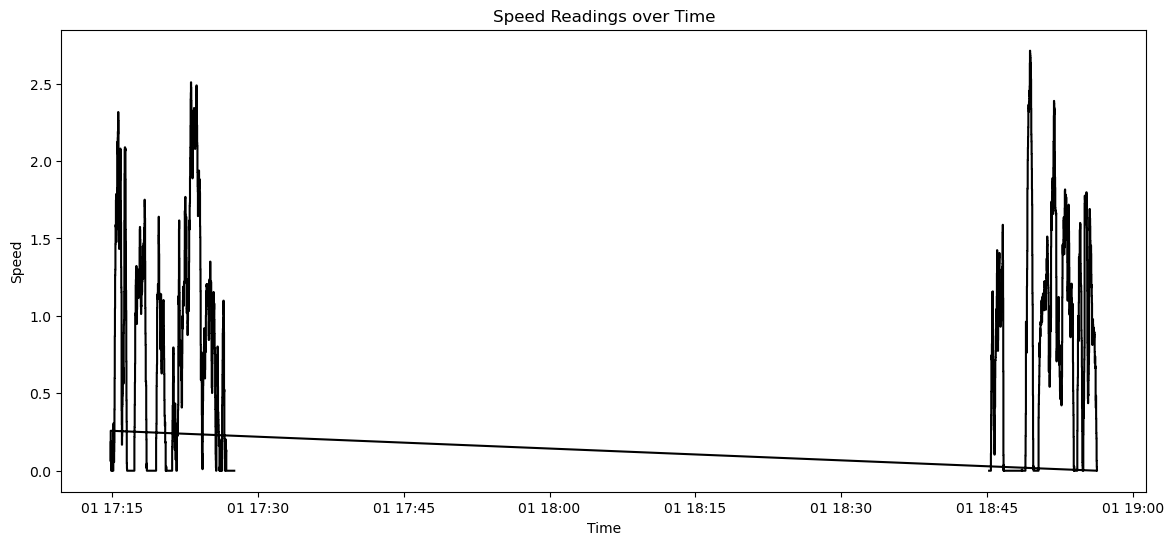

In [112]:
plt.figure(figsize=(14, 6))
plt.plot(newdf['Time'], newdf['Speed'], label='Speed',color='Black')
plt.title('Speed Readings over Time')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.show

# Applying Smoothing and Saving Dataset

In [115]:
# Saving the cleaned dataset after removing duplicates and applying smoothing
data_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'
